

# Project: Investigate a  The Movie DataBase (TMDB) Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzin a data set containing information about 10000+ movies collected from The Movie Database(TMDb).

Upon analysis, we wil try to answer following questions:

1) Do people watch movies now more than the last century ?

2) Is there a relation between the budget and popularity, so do people watch movies that cost a lot or no?

3) Is movies revenues increased over the past decades ?

4) Is the movies runtimes increased over the years ?


In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [16]:

df = pd.read_csv('archive\\tmdb-movies.csv')

In [17]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [18]:
print(df.duplicated().sum())
print(df.isnull().sum())
df.columns

1
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

 there are alot of missing values in this data set,
 there are 21 columns and 10866 rows in this dataframe, some of the columns aren't necessary 



### Data Cleaning 

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().any()
# no more duplicates in the dataset 
# now we will remove the unnecessary columns from the dataset
columns = ['id', 'imdb_id','original_title', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj','revenue_adj']
df.drop(columns=columns,inplace=True)
df.release_date = pd.to_datetime(df.release_date,dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10842 non-null  object        
 7   production_companies  9835 non-null   object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ M

In [20]:
# now our dataset is filtered and clear from duplicates , BUT there are some missing data 
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [21]:
df.dropna(inplace=True)
df.isnull().any()

popularity              False
budget                  False
revenue                 False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [22]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

date1 = df.release_date
Darr = []

for x in date1:
    s = to_integer(x)
    if s <= 20151230:
        Darr.append(s)
    else:
        s = s - 1000000
        Darr.append(s)    
   
df.release_date = pd.to_datetime(Darr,format='%Y%m%d')
df.set_index(df.release_date,inplace=True)
# fixing the problem that accurs with converting to date time the problem was the instead of moking 1/1/66 => 1/1/1966 it make it 1/1/2066 
# with the steps above i fixed this problem by converting the date time to intgers the i substract 1000000 from the intger before adding it to the Darr list
# after putting all datetime values all "release_date" values in Darr i convert it again to a date time 
df.drop(columns='release_date',inplace=True)
# there are no need for the release_date column i will use the index instead
df.replace(0,np.nan,inplace=True)
df.dropna(inplace=True)
# removing all the 0 values in the data set 
# now our dataset if filtered and clear from duplicated and missing values NOW THE DATA IS READY TO ANSWER OUR QUESTIONS.
df

popularity       budget       revenue  \
release_date                                          
2015-09-06     32.985763  150000000.0  1.513529e+09   
2015-05-13     28.419936  150000000.0  3.784364e+08   
2015-03-18     13.112507  110000000.0  2.952382e+08   
2015-12-15     11.173104  200000000.0  2.068178e+09   
2015-01-04      9.335014  190000000.0  1.506249e+09   
...                  ...          ...           ...   
1966-06-21      0.670274    7500000.0  3.373669e+07   
1966-07-13      0.402730    3000000.0  1.300000e+07   
1966-12-17      0.395668    4653000.0  6.000000e+06   
1966-12-20      0.299911   12000000.0  2.000000e+07   
1966-08-24      0.207257    5115000.0  1.200000e+07   

                                                           cast  \
release_date                                                      
2015-09-06    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
2015-05-13    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2015-03-18    Shailene Woodley|Theo James|Kate Winslet|Ansel...   
2015-12-15    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
2015-01-04    Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                         ...   
1966-06-21    Elizabeth Taylor|Richard Burton|George Segal|S...   
1966-07-13    Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...   
1966-12-17    John Wayne|Robert Mitchum|James Caan|Charlene ...   
1966-12-20    Steve McQueen|Richard Attenborough|Richard Cre...   
1966-08-24    Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...   

                       director  runtime  \
release_date                               
2015-09-06      Colin Trevorrow    124.0   
2015-05-13        George Miller    120.0   
2015-03-18     Robert Schwentke    119.0   
2015-12-15          J.J. Abrams    136.0   
2015-01-04            James Wan    137.0   
...                         ...      ...   
1966-06-21         Mike Nichols    131.0   
1966-07-13     Alfred Hitchcock    128.0   
1966-12-17         Howard Hawks    120.0   
1966-12-20          Robert Wise    182.0   
1966-08-24    Richard Fleischer    100.0   

                                                 genres  \
release_date                                              
2015-09-06    Action|Adventure|Science Fiction|Thriller   
2015-05-13    Action|Adventure|Science Fiction|Thriller   
2015-03-18           Adventure|Science Fiction|Thriller   
2015-12-15     Action|Adventure|Science Fiction|Fantasy   
2015-01-04                        Action|Crime|Thriller   
...                                                 ...   
1966-06-21                                        Drama   
1966-07-13                             Mystery|Thriller   
1966-12-17                               Action|Western   
1966-12-20           Action|Adventure|Drama|War|Romance   
1966-08-24                    Adventure|Science Fiction   

                                           production_companies  vote_count  \
release_date                                                                  
2015-09-06    Universal Studios|Amblin Entertainment|Legenda...        5562   
2015-05-13    Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2015-03-18    Summit Entertainment|Mandeville Films|Red Wago...        2480   
2015-12-15            Lucasfilm|Truenorth Productions|Bad Robot        5292   
2015-01-04    Universal Pictures|Original Film|Media Rights ...        2947   
...                                                         ...         ...   
1966-06-21                                 Chenault Productions          74   
1966-07-13                                   Universal Pictures          46   
1966-12-17                Paramount Pictures|Laurel Productions          36   
1966-12-20    Twentieth Century Fox Film Corporation|Solar P...          28   
1966-08-24               Twentieth Century Fox Film Corporation          42   

              vote_average  release_year  
release_date  

there are 3807 enteries and 9 columns after the data cleaning procces if fulfiled. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
Do people watch movies now more than the last century ?

Text(0.5, 0, 'Release Year')

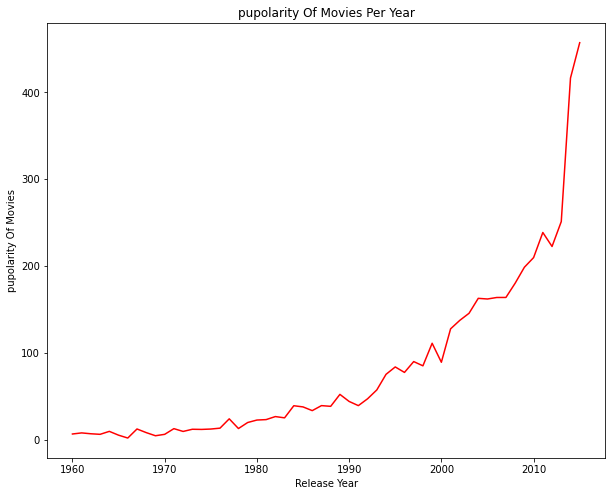

In [23]:
df.groupby('release_year')['popularity'].sum().plot(figsize=(10,8),color='red')
plt.title('pupolarity Of Movies Per Year')
plt.ylabel('pupolarity Of Movies')
plt.xlabel("Release Year")

People watch movies more than they watched in the past, but the increase did not start in the current century it actually starts in the 80s and 90s of the last century 

### Research Question 2  
Is there a relation between the budget and popularity, so do people watch movies that cost a lot or no?

<AxesSubplot:xlabel='budget', ylabel='popularity'>

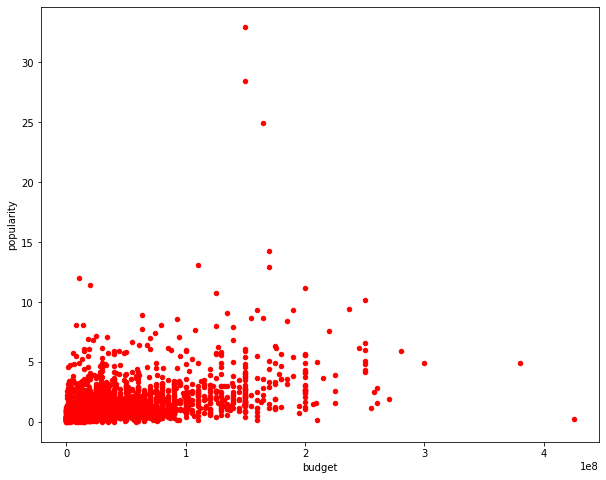

In [24]:
df.plot.scatter(x='budget',y='popularity',color='red',figsize=(10,8))

There is no relation between the cost or budget of the movie and the movie popularity of a movie

### Research Question 3  
Is movies revenues increased over the past decades ?

Text(0.5, 0, 'Release Year')

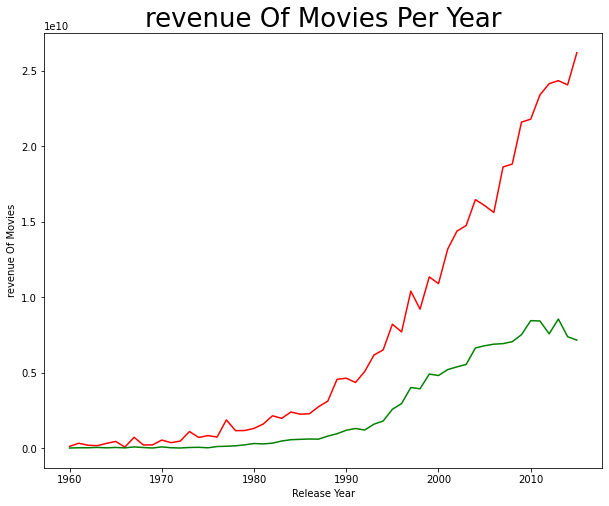

In [25]:
df.groupby('release_year')['revenue'].sum().plot(figsize=(10,8),color='red')
df.groupby('release_year')['budget'].sum().plot(figsize=(10,8),color='green')
plt.title('revenue Of Movies Per Year', size=26)
plt.ylabel('revenue Of Movies')
plt.xlabel("Release Year")

Movies are generating revenue more than what the used to generate in the past.
As the graph shown the gap between the red line " revenue line " and the green line " budget line " is the profit.
From the graph we can see that the movie producers are making profit from the movies, the amuont of profit is increasing rapidly from 1990, this shown popularity of movies and the number of views are increaing.


### Research Question 4 
Is the movies runtimes increased over the years ?

Text(0.5, 0, 'Release Year')

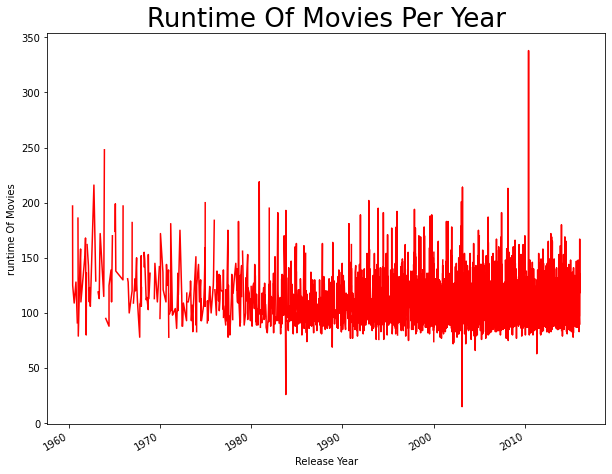

In [26]:
df.groupby('release_year')['runtime'].plot(figsize=(10,8), color= 'red')
plt.title('Runtime Of Movies Per Year', size=26)
plt.ylabel('runtime Of Movies')
plt.xlabel("Release Year")

The runtime of movies did not increased over the years, they are the same.
The range of runtime for most movies are from 90 to 150 minutes the range is the same in the past.
From the graph we can see that the number of movies per year are increasing. 

<AxesSubplot:>

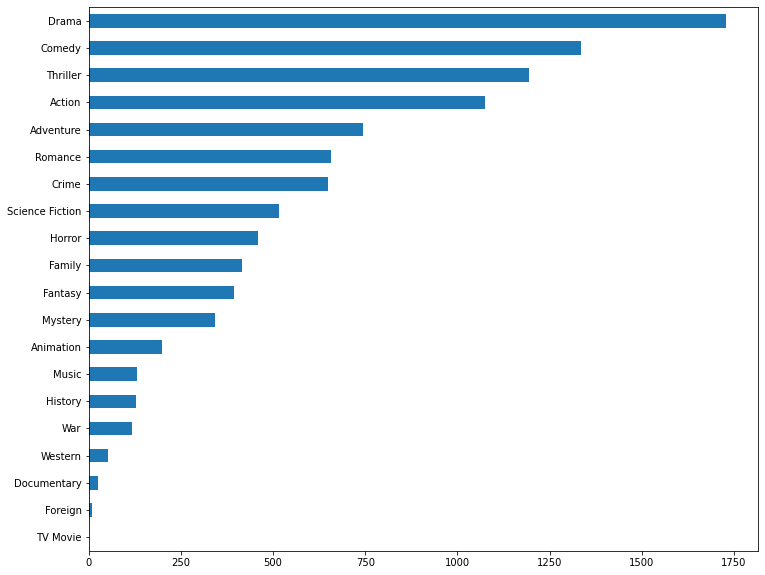

In [27]:
def extract(column_name):
    all_data = df[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    count = all_data.value_counts(ascending = False)
    return count

all_genres = extract('genres')
all_genres.sort_values(ascending =True, inplace=True)
all_genres.head(25).plot.barh(figsize=(12,10))

<AxesSubplot:>

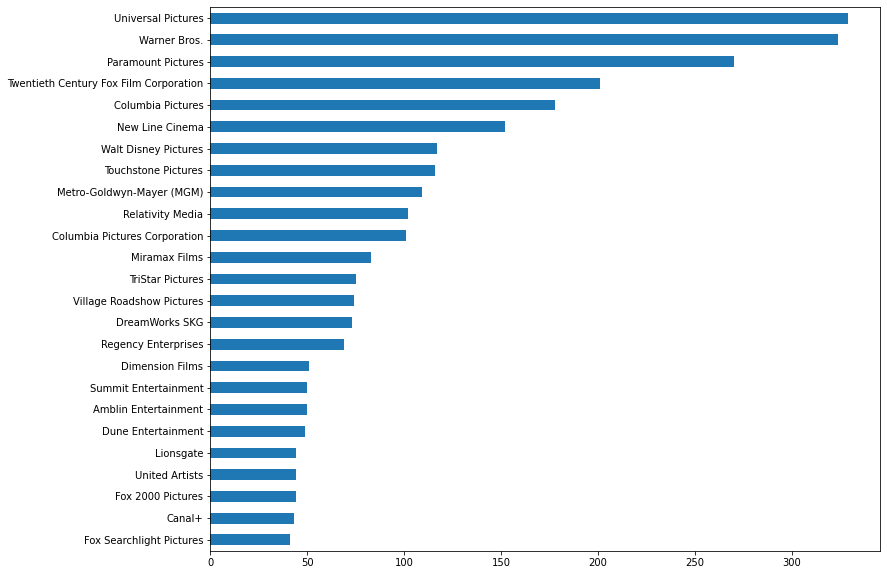

In [28]:
top25_production_companies = extract('production_companies').head(25)
top25_production_companies.sort_values(ascending =True, inplace=True)
top25_production_companies.head(25).plot.barh(figsize=(12,10))

<a id='conclusions'></a>
## Conclusions

1) People are watching movies more that they used to watch.<br>
2) 'Warner Bros' and 'Universal Pictures' are the most profitable production companies.<br>
3) Drama & Comedy are the most filmed genre.<br>
4) The least popular genres were "Documentary" and "Foreign".<br>
5) The duration of movies did not chane over trhe time.<br>
6) The production companies make more profit than they used to because the number of people watching the movies increased and the budget did not increased the same as the revenue of the movies. 

## Limitations
1) There was a lot of missing data in the dataset.<br>
2) In the dataset, some of the fields were '0' i dropped all entries that contains zero and null values.
3) The genres and other columns have many values that was not useful when working with it.